# <center> Finding the Two Best Markets to Advertise in an E-learning Product

<b> In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from <b>freeCodeCamp's 2017 New Coder Survey. freeCodeCamp</b> is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository: https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
print(data.shape)
pd.options.display.max_columns = 150
data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
data.tail()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,10.0,3ca0354e77ccbdf5d762adab90ffff91,34d08433308c04cd55708ba405d8b519,60000.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,Indonesian,married or domestic partnership,10.0,1.0,d08e67871b,2017-04-03 15:02:42,2017-04-03 15:00:15,2017-04-03 15:06:47,2017-04-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male,NaN,1.0,1.0,1.0,0.0,1.0,0.0,0.0,50000.0,1.0,fc867e53a2adb0b425d2acacaef17faa,6798a2a1aa62ec516ac2ac540883001a,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,IT Specialist,1.0,1.0,1.0,work for a nonprofit,1.0,"DevOps / SysAdmin, Mobile Developer, Pro...",no preference,English,divorced,10000.0,1.0,db213e7dfc,2017-04-01 20:25:23,2017-04-01 20:08:41,2017-04-01 20:38:28,2017-04-01 20:26:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,Na

## Checking for Sample Representativity

<b> For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning. 

<b> Let's find out whether the sample we have is representative of the population of interest to us. </b>

The <b>JobRoleInterest</b> column for each participant describes the roles in which they would like to work.
Let's create a frequency distribution histogram for this column.

In [4]:
print((data['JobRoleInterest'].value_counts(normalize = True) * 100).head(50))

JobRoleInterest
Full-Stack Web Developer                                                           11.770595
  Front-End Web Developer                                                           6.435927
  Data Scientist                                                                    2.173913
Back-End Web Developer                                                              2.030892
  Mobile Developer                                                                  1.673341
Game Developer                                                                      1.630435
Information Security                                                                1.315789
Full-Stack Web Developer,   Front-End Web Developer                                 0.915332
  Front-End Web Developer, Full-Stack Web Developer                                 0.800915
  Product Manager                                                                   0.786613
Data Engineer                                         


The information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject

We will discard zero <b>Nan</b> values, they are not needed for our analysis

In [5]:
print(data['JobRoleInterest'].isnull().sum()) # sum Nan values
print(len(data['JobRoleInterest'])) # sum values in JobRoleInterest column

11183
18175


In [6]:
Role_Interest_nonull = data['JobRoleInterest'].dropna() # data cleaned of Nan
print(len(Role_Interest_nonull)) 

6992


We also should separate respondents interested in one direction and many. Let's determine the percentage ratios of these groups.

In [7]:
split_interests = Role_Interest_nonull.str.split(',')
sum_split = split_interests.apply(lambda x: len(x))
print(sum_split.value_counts(normalize = True).sort_index() * 100)

JobRoleInterest
1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: proportion, dtype: float64


The table indicates that only <b>31.7%</b> of respondents have made a decision regarding their choice of courses.

Let's find out what percentage of respondents chose mobile or web development.

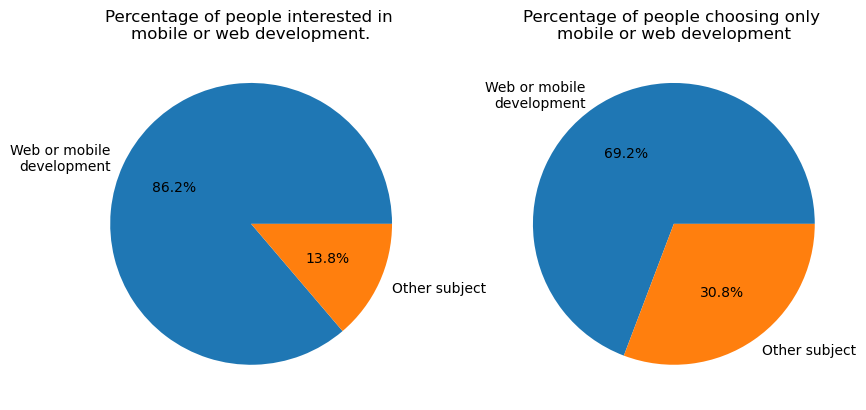

In [8]:
web_mobile_all = Role_Interest_nonull.str.contains('Web Developer|Mobile Developer')
web_mobile_percent = web_mobile_all.value_counts(normalize = True) * 100

web_mobile_list = []
for value in Role_Interest_nonull:
    if ',' not in value:
        web_mobile_list.append(value)
s = pd.Series(web_mobile_list)
web_mobile_role = s.str.contains('Web Developer|Mobile Developer').value_counts(normalize = True) * 100

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
web_mobile_percent.plot.pie(ax=axes[0], labels = ['Web or mobile\ndevelopment', 'Other subject'], autopct='%1.1f%%')
axes[0].set_title('Percentage of people interested in \nmobile or web development.')

web_mobile_role.plot.pie(ax=axes[1], labels = ['Web or mobile\ndevelopment', 'Other subject'], autopct='%1.1f%%')
axes[1].set_title('Percentage of people choosing only \nmobile or web development')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
plt.show()

The data shows that <b>86%</b> of all respondents are interested in mobile or web development. And the proportion of respondents choosing only mobile or web development was <b>69%</b>. These data indicate that the sample is representative.

## Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the <b>CountryLive</b> variable, which describes what country each participant lives in 

In [9]:
new_data = data[data['JobRoleInterest'].notnull()].copy()

absolute = new_data['CountryLive'].value_counts()
relative = new_data['CountryLive'].value_counts(normalize = True) * 100
pd.DataFrame(data = {'Absolute frequency':absolute, 'Percentage':relative})

,Absolute frequency,Percentage
CountryLive,,
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624


<b>45.7%</b> of our potential clients are located in the <b>USA</b>, making it definitely the most interesting market. <b>India</b> comes second in terms of client density, constituting <b>7.7%</b>, followed by the <b>United Kingdom (4.6%)</b> and <b>Canada (3.8%)</b>.

<b> It would also be helpful for us to know what price they are willing to pay for courses.

## Spending Money for Learning

Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the <b>MoneyForLearning</b> column to the <b>MonthsProgramming</b> column. The problem is that some students answered that they have been learning to code for <b>0</b> months (it might be that they have just started). To avoid dividing by <b>0</b>, we'll replace <b>0</b> with <b>1</b> in the <b>MonthsProgramming</b> column.

In [10]:
new_data['MonthsProgramming'].replace(0, 1, inplace = True) # replace 0 => 1

# Create a new column that describes the amount of money a student has spent per month
new_data['money_per_month'] = new_data['MoneyForLearning'] / new_data['MonthsProgramming'] 
new_data['money_per_month'].isnull().sum()

675

Let's keep only the rows that don't have null values for the <b>money_per_month</b> column.

In [11]:
new_data = new_data[new_data['money_per_month'].notnull()]

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. 

In [12]:
# Remove the rows with null values in 'CountryLive'
new_data = new_data[new_data['CountryLive'].notnull()]

# Frequency table, by CountryLive column
new_data['CountryLive'].value_counts().head()

CountryLive
United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: count, dtype: int64

Let's compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [13]:
# calculate the average amount of money that students spend each month
group = new_data.groupby(['CountryLive'])
mean = group['money_per_month'].mean()
countries_mean = mean.sort_values(ascending=False)

# we are only interested in countries with the largest number of students
countries_mean[['United States of America', 'India', 'United Kingdom', 'Canada']] 

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the <b>United Kingdom</b> and <b>Canada</b> are a bit surprising relative to the values we see for <b>India</b>. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the <b>UK</b> and <b>Canada</b> to spend more on learning than people in <b>India</b>.

It might be that we don't have have enough representative data for the <b>United Kingdom</b> and <b>Canada</b>, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for <b>India</b>, or too low for the <b>UK</b> and <b>Canada</b>. Or it might be that the results are correct.

<b> Let's use box plots to visualize the distribution of the Money_per_month variable for each country of interest.

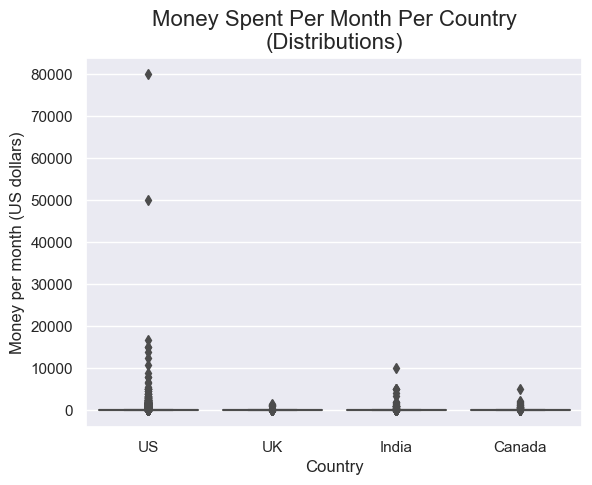

In [14]:
sns.set()
interests_countries = new_data[new_data['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = interests_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 

plt.show()

In the graph, we see that our statistics are affected by two large deviations for the <b>USA (over 20k)</b> and one deviation for <b>India (10k)</b>. let's exclude them from our data

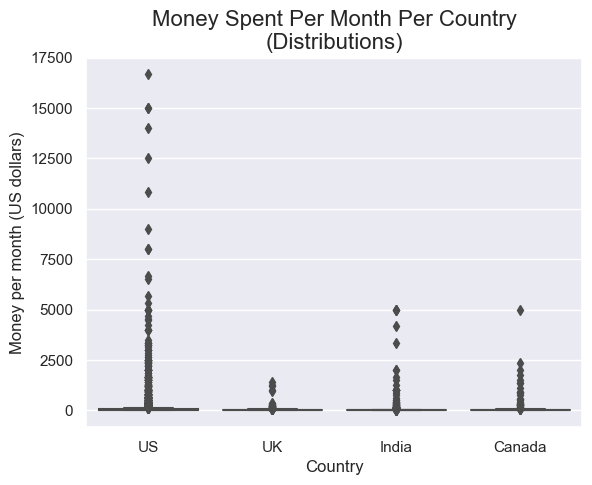

In [15]:
# drop unnecessary data
over_20k = new_data[new_data['money_per_month'] >= 20000]
india_outliers = new_data[(new_data['CountryLive'] == 'India') & (new_data['money_per_month'] >=10000)]
countries = new_data.drop(over_20k.index)
countries = countries.drop(india_outliers.index)
countries = countries[countries['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 

plt.show()

We have obtained interesting data. Now we have deviations in the <b>USA</b> data <b>(exceeding 6k)</b>, for <b>India (over 2.5k)</b>, and for <b>Canada (over 4k)</b>. Let's remove them.

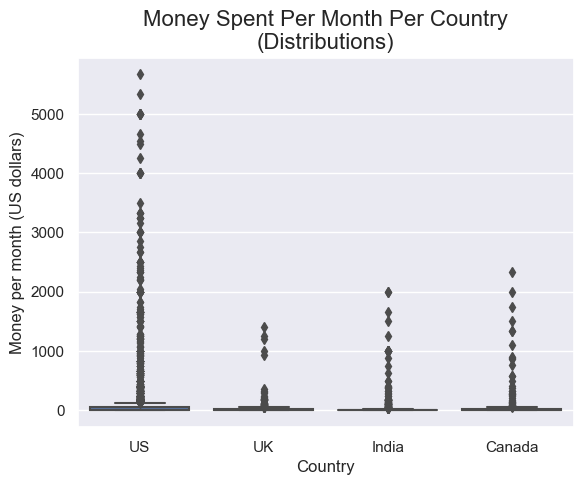

In [16]:
over_6k = new_data[new_data['money_per_month'] >= 6000]
india_out = new_data[(new_data['CountryLive'] == 'India') & (new_data['money_per_month'] >=2500)]
canada_out = new_data[(new_data['CountryLive'] == 'Canada') & (new_data['money_per_month'] >=4000)]
new_countries = new_data.drop(over_6k.index, errors='ignore')
new_countries = new_countries.drop(india_out.index, errors='ignore')
new_countries = new_countries.drop(canada_out.index, errors='ignore')
new_countries = new_countries[new_countries['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = new_countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

plt.show()

The chart provides clear data indicating that we need to place advertisements in the <b>USA</b>. <b>Canada</b> comes in second place, with a minimal margin over <b>India</b>. 

Let's calculate the mean values for the updated data.

In [17]:
new = new_countries.groupby('CountryLive')
mean = new['money_per_month'].mean()
four_countries = mean.sort_values(ascending=False)
four_countries[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: money_per_month, dtype: float64

In the cleaned data without outliers, we see an average amount of <b>93</b> dollars for <b>Canada</b>, and <b>65</b> dollars for <b>India</b>.

To make a final decision on whether to choose <b>India</b> or <b>Canada</b>, it is worth comparing the number of potential customers in our cleaned sample.

In [18]:
print(new_countries['CountryLive'].value_counts(normalize=True) * 100)

CountryLive
United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: proportion, dtype: float64


The choice between <b>Canada</b> and <b>India</b> is not clear-cut. On average, potential customers in <b>Canada</b> are willing to pay a higher amount, but there are nearly twice as many customers in <b>India</b>. 

Perhaps we should convey that we definitely need to advertise in the <b>USA</b>, and inform about the advantages and disadvantages of advertising in <b>India</b> and <b>Canada</b>.

Let's visualize the results we obtained on the graphs for better clarity.

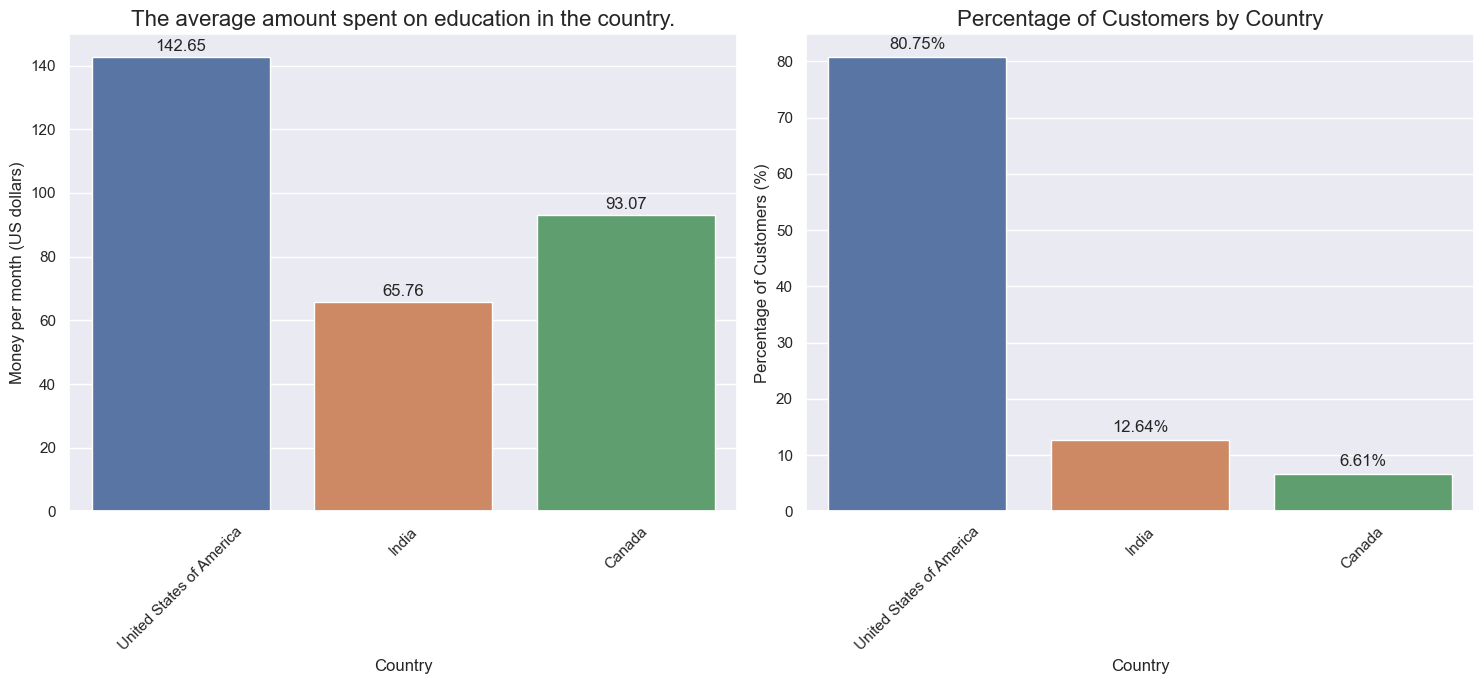

In [19]:
# drop UK from visualization
uk = new_data[(new_data['CountryLive'] == 'United Kingdom')]
new_count = new_countries.drop(uk.index, errors='ignore')
grouped = new_count.groupby('CountryLive')

mean = grouped['money_per_month'].mean()
mean_sorted = mean.sort_values(ascending=False)
selected_countries = mean_sorted[['United States of America', 'India', 'Canada']]

percentage = new_count['CountryLive'].value_counts(normalize=True) * 100
percentage_selected = percentage[['United States of America', 'India', 'Canada']]

combined_data = pd.DataFrame({
    'Mean Money per Month': selected_countries,
    'Percentage': percentage_selected
})

fig, ax1 = plt.subplots(1, 2, figsize=(15, 7))

# graph of money spent per month
sns.barplot(x=combined_data.index, y=combined_data['Mean Money per Month'], ax=ax1[0])
ax1[0].set_title('The average amount spent on education in the country.', fontsize = 16)
ax1[0].set_ylabel('Money per month (US dollars)')
ax1[0].set_xlabel('Country')
ax1[0].tick_params(axis='x', rotation=45)
for index, value in enumerate(combined_data['Mean Money per Month']):
    ax1[0].text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

# graph of percentage of customers by country
sns.barplot(x=combined_data.index, y=combined_data['Percentage'], ax=ax1[1])
ax1[1].set_title('Percentage of Customers by Country', fontsize = 16)
ax1[1].set_ylabel('Percentage of Customers (%)')
ax1[1].set_xlabel('Country')
ax1[1].tick_params(axis='x', rotation=45)
for index, value in enumerate(combined_data['Percentage']):
    ax1[1].text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the <b>US</b> would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between <b>India</b> and <b>Canada</b>. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.